In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score




In [ ]:
df = pd.read_csv('/content/weather_data (1).csv')

In [ ]:
df = df.dropna()

In [ ]:
X = df.drop(['wind_speed'], axis=1)  # Replace 'wind_speed' with your actual target column
y = df['wind_speed']

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=5)

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "XGBoost": XGBRegressor(verbosity=0)  # Set verbosity=0 to suppress output
}

In [ ]:
r2_scores = []
model_names = []

In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    r2 = r2_score(y_test, preds)
    r2_scores.append(r2)
    model_names.append(name)
    print(f"{name}: R² = {r2:.4f}")


Linear Regression: R² = 0.0493
Decision Tree: R² = -0.5721
Random Forest: R² = -0.1852
XGBoost: R² = -0.9290


In [ ]:
#Best Model
best_index = np.argmax(r2_scores)
best_model_name = model_names[best_index]
best_r2 = r2_scores[best_index]

In [ ]:
print("\n Best Model:")
print(f"{best_model_name} with R² = {best_r2:.4f}")


 Best Model:
Linear Regression with R² = 0.0493


(-1.0, 1.0)

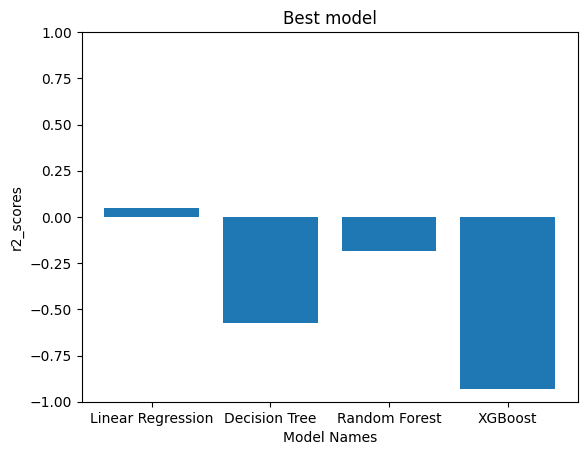

In [ ]:
#Plotting the bar graph
plt.figure()
plt.bar(model_names,r2_scores)
plt.xlabel("Model Names")
plt.ylabel("r2_scores")
plt.title("Best model")
plt.ylim(-1, 1)
